In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
### Fig.2(A)

In [2]:
data3 = pd.read_pickle('G_ripple_data3.pkl')

In [3]:
data3.head(2)

,group,delta_C_ITE
0,coauthor,-0.206054
1,coauthor,0.314394


In [4]:
from scipy.stats import ttest_ind
group1_data = data3.loc[data3['group'] == 'coauthor', 'delta_C_ITE']
group2_data = data3.loc[data3['group'] == 'winner', 'delta_C_ITE']
t_statistic, p_value = ttest_ind(group1_data, group2_data)
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}') ## p<0.001 The means of the delta_C_ITE for winners and coauthors are significantly different

T-Statistic: -12.315789497289774
P-Value: 7.667612540224395e-35


In [5]:
aggregations = {
    'mean': ('delta_C_ITE', np.mean),
    '95% CI': ('delta_C_ITE', lambda x: 1.96 * np.std(x) / np.sqrt(len(x)))
}

result3 = data3.groupby(["group"]).agg(**aggregations)
result3['group'] = result3.index 
result3

,mean,95% CI,group
group,,,
coauthor,0.113026,0.002895,coauthor
winner,0.250132,0.015512,winner


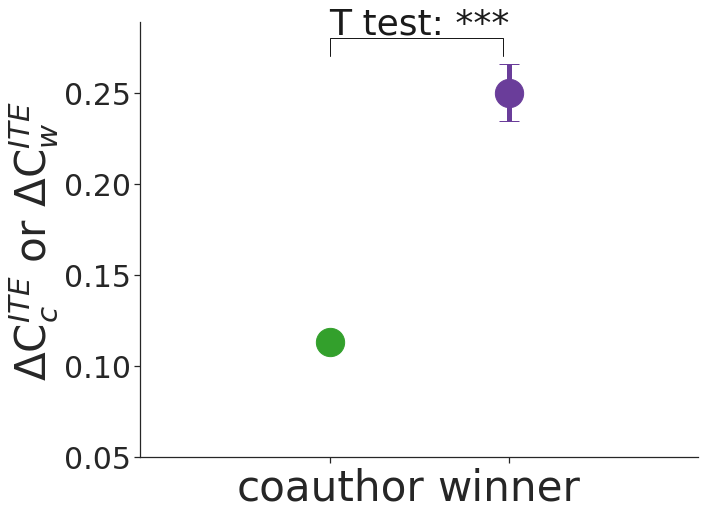

In [10]:
sns.set(font_scale=1.5)
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10,8))
##coauthor
plt.scatter(0.34, 0.113026, marker='o', s=800, edgecolors='#33A02C', facecolors='#33A02C', zorder=0)
plt.errorbar(0.34, 0.113026, yerr=0.002895, color='#33A02C', capsize=10,elinewidth=5)
## winner
plt.scatter(0.66, 0.250132, marker='o', s=800, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=0)
plt.errorbar(0.66, 0.250132, yerr=0.015512, color='#6A3D9A', capsize=10,elinewidth=5)
x1, x2 = 0.34, 0.65
ax.plot([x1, x1, x2, x2], [0.250132+0.02, 0.250132+0.03,0.250132+0.03, 0.250132+0.02], lw=1, c="k")
p_value_cov = 0.001  
stars = "***" 
ax.text(0.5, 0.288, f"T test: {stars}", ha='center', va='center', color="k", fontsize=36)
plt.ylabel(r"ΔC$^{ITE}_{c}$ or ΔC$^{ITE}_{w}$", fontsize=42)
plt.xticks([0.34, 0.66], ['coauthor', 'winner'], fontsize=42)
plt.yticks(fontsize=30)
plt.xlim(0, 1)
plt.ylim(0.050)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
### Fig.2(B)

In [3]:
data4 = pd.read_csv('G_ripple_data4.pkl')

In [4]:
data4.head(2)

,Unnamed: 0,delta_C_coauthor,delta_C_winner,WinnerID
0,0,0.513297,0.937852,1
1,1,0.091223,0.045757,2


In [5]:
from scipy.stats import pearsonr
correlation = pearsonr(data4['delta_C_winner'], data4['delta_C_coauthor'])
correlation

(0.30043347352406347, 7.663751869415803e-63)

In [6]:
data4['interval'] = pd.cut(data4['delta_C_winner'], bins=10, right=False)

In [7]:
data4.head(1)

,Unnamed: 0,delta_C_coauthor,delta_C_winner,WinnerID,interval
0,0,0.513297,0.937852,1,"[0.895, 1.079)"


In [8]:
aggregations = {
    'mean': ('delta_C_coauthor', np.mean),
    '95% CI': ('delta_C_coauthor', lambda x: 1.96 * np.std(x) / np.sqrt(len(x)))}
result4 = data4.groupby(["interval"]).agg(**aggregations)
result4

,mean,95% CI
interval,,
"[-0.396, -0.212)",0.044053,0.030468
"[-0.212, -0.0273)",0.039917,0.019216
"[-0.0273, 0.157)",0.060326,0.017579
"[0.157, 0.342)",0.106672,0.017132
"[0.342, 0.526)",0.122092,0.021108
"[0.526, 0.711)",0.179049,0.024594
"[0.711, 0.895)",0.194005,0.028078
"[0.895, 1.079)",0.269020,0.046391
"[1.079, 1.264)",0.244199,0.065460


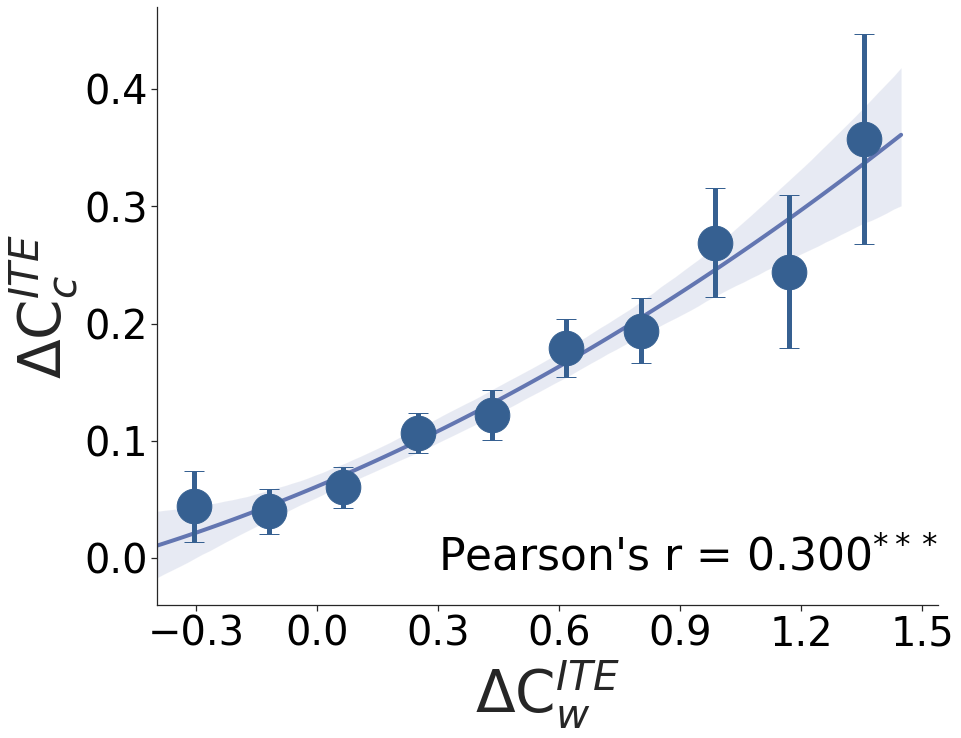

In [9]:
sns.set(font_scale=1.5)
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(14,11))
sns.regplot(x='delta_C_winner', y='delta_C_coauthor', data=data4,ci=95, order=2,line_kws={"color": '#6376B1',"linewidth": 4},ax=ax, scatter=False)
##
plt.scatter(-0.304, 0.044053, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(-0.304, 0.044053, yerr=0.030468, color="#366091", capsize=10,elinewidth=5)
plt.scatter(-0.11965, 0.039917, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(-0.11965, 0.039917, yerr=0.019216, color="#366091", capsize=10,elinewidth=5)
plt.scatter(0.06485, 0.060326, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(0.06485, 0.060326, yerr=0.017579, color="#366091", capsize=10,elinewidth=5)
plt.scatter(0.2495, 0.106672, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(0.2495, 0.106672, yerr=0.017132, color="#366091", capsize=10,elinewidth=5)
plt.scatter(0.434, 0.122092, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(0.434, 0.122092, yerr=0.021108, color="#366091", capsize=10,elinewidth=5)
plt.scatter(0.6185, 0.179049, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(0.6185, 0.179049, yerr=0.024594, color="#366091", capsize=10,elinewidth=5)
plt.scatter(0.803, 0.194005, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(0.803, 0.194005, yerr=0.028078, color="#366091", capsize=10,elinewidth=5)
plt.scatter(0.987, 0.269020, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(0.987, 0.269020, yerr=0.046391, color="#366091", capsize=10,elinewidth=5)
plt.scatter(1.1715, 0.244199, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(1.1715, 0.244199, yerr=0.065460, color="#366091", capsize=10,elinewidth=5)
plt.scatter(1.357, 0.357318, marker='o', s=1200, edgecolors="#366091", facecolors="#366091", zorder=2)
plt.errorbar(1.357, 0.357318, yerr=0.089584, color="#366091", capsize=10,elinewidth=5)
##
plt.xlim(-0.396569, None)
plt.xlabel(r"ΔC$^{ITE}_{w}$", fontsize=58)
plt.ylabel(r"ΔC$^{ITE}_{c}$",fontsize=58)
plt.xticks(np.arange(-0.3, 1.7, 0.3),fontsize=40,color='black')
plt.yticks(fontsize=40,color='black')
text = r"Pearson's r = 0.300$^{***}$"
plt.text(0.3,-0.018, text, fontsize=44, color='black', ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
### Fig.2(C)

In [15]:
data5 = pd.read_pickle('G_ripple_data5.pkl')

In [16]:
data5.head(2)

,delta_C_winner,C_b_winner,interval,group
0,-0.454566,1.101344,1.046-1.195,winner
1,0.937852,0.760240,0.747-0.896,winner


In [17]:
correlation = pearsonr(data5['C_b_winner'], data5['delta_C_winner'])
correlation

(0.2680475153350562, 2.6446436528340033e-58)

In [18]:
aggregations = {
    'mean': ('delta_C_winner', np.mean),
    '95% CI': ('delta_C_winner', lambda x: 1.96 * np.std(x) / np.sqrt(len(x)))}
result5 = data5.groupby(["interval"]).agg(**aggregations)
result5

,mean,95% CI
interval,,
0.0-0.149,0.056364,0.023757
0.149-0.299,0.094279,0.025891
0.299-0.448,0.172040,0.027440
0.448-0.598,0.235017,0.030824
0.598-0.747,0.320799,0.038928
0.747-0.896,0.398828,0.058867
0.896-1.046,0.398035,0.074542
1.046-1.195,0.371530,0.102985
1.195-1.345,0.458120,0.140240


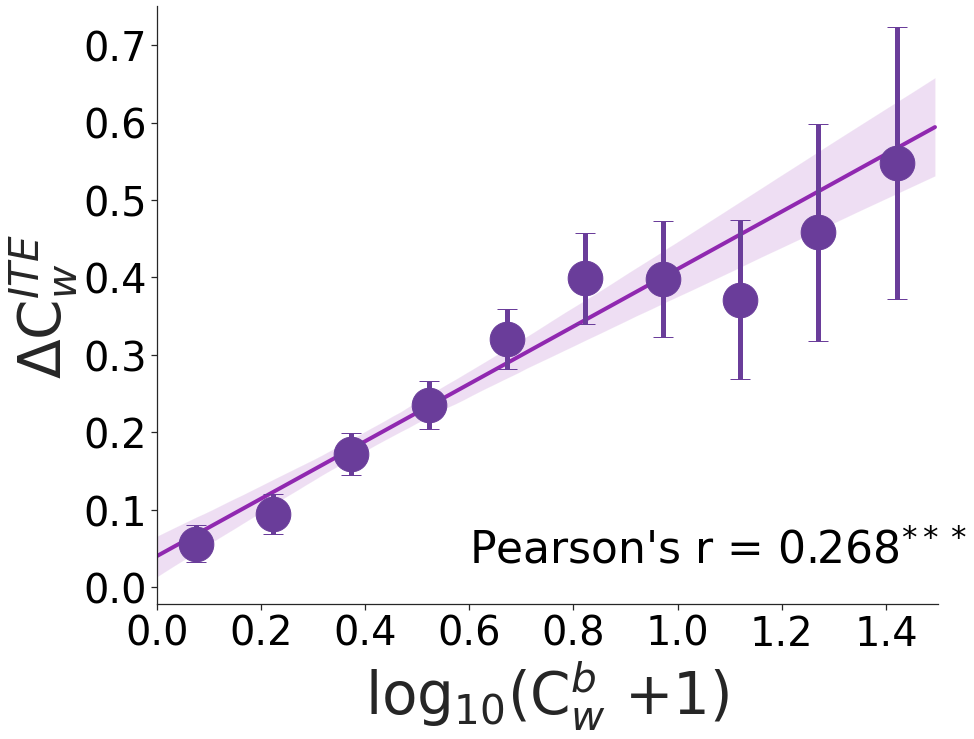

In [19]:
sns.set(font_scale=1.5)
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(14,11))
sns.regplot(x='C_b_winner', y='delta_C_winner', data=data5,ci=95, order=1,x_bins=np.arange(0.00, 1.50, 10),line_kws={"color": "#9028B0","linewidth": 4},ax=ax, scatter=False)
##
plt.scatter(0.0745, 0.056364, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.0745, 0.056364, yerr=0.023757, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(0.22399999999999998, 0.094279, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.22399999999999998, 0.094279, yerr=0.025891, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(0.3735, 0.172040, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.3735, 0.172040, yerr=0.027440, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(0.523, 0.235017, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.523, 0.235017, yerr=0.030824, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(0.6725, 0.320799, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.6725, 0.320799, yerr=0.038928, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(0.8215, 0.398828, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.8215, 0.398828, yerr=0.058867, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(0.971, 0.398035, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(0.971, 0.398035, yerr=0.074542, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(1.1205, 0.371530, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(1.1205, 0.371530, yerr=0.102985, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(1.27, 0.458120, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(1.27, 0.458120, yerr=0.140240, color='#6A3D9A', capsize=10,elinewidth=5)
plt.scatter(1.4205, 0.547843, marker='o', s=1200, edgecolors='#6A3D9A', facecolors='#6A3D9A', zorder=2)
plt.errorbar(1.4205, 0.547843, yerr=0.175890, color='#6A3D9A', capsize=10,elinewidth=5)
##
plt.xlim(0.00, 1.50)
plt.ylim(None,0.75)
plt.xlabel(r"log$_{10}$(C$^{b}_{w}$ +1)", fontsize=58)
plt.ylabel(r"ΔC$^{ITE}_{w}$",fontsize=58)
plt.xticks(fontsize=40,color='black')
plt.yticks(fontsize=40,color='black')
text = r"Pearson's r = 0.268$^{***}$"
plt.text(0.6,0.02, text, fontsize=44, color='black', ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
### Fig.2(D)

In [20]:
data6 = pd.read_pickle('G_ripple_data6.pkl')

In [21]:
data6.head(2)

,delta_C_coathor,C_b_coauthor,interval,group
0,-0.206054,0.532845,0.42-0.56,coauthor
1,0.314394,0.693507,0.56-0.7,coauthor


In [22]:
correlation = pearsonr(data6['C_b_coauthor'], data6['delta_C_coathor'])
correlation

(0.05731891774165593, 2.6214223987274333e-139)

In [23]:
aggregations = {
    'mean': ('delta_C_coathor', np.mean),
    '95% CI': ('delta_C_coathor', lambda x: 1.96 * np.std(x) / np.sqrt(len(x)))}
result6 = data6.groupby(["interval"]).agg(**aggregations)
result6

,mean,95% CI
interval,,
0.0-0.14,0.068326,0.007163
0.14-0.28,0.068624,0.010457
0.28-0.42,0.071868,0.008153
0.42-0.56,0.074926,0.007290
0.56-0.7,0.100877,0.006896
0.7-0.84,0.130054,0.007466
0.84-0.98,0.142094,0.008336
0.98-1.12,0.171732,0.010570
1.12-1.26,0.176811,0.014689


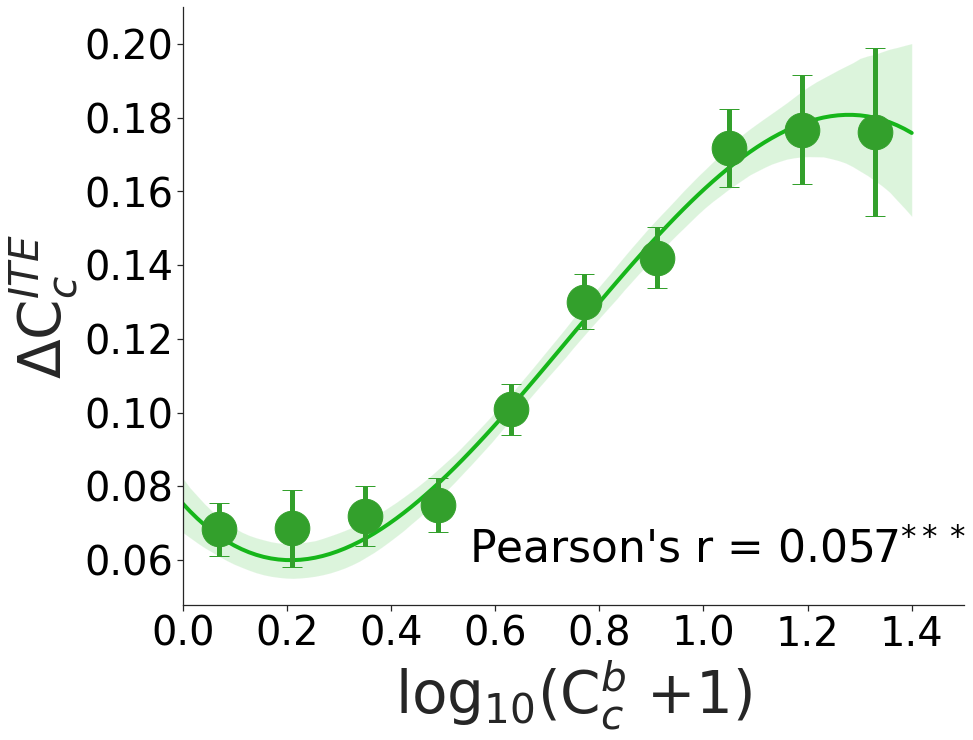

In [24]:
sns.set(font_scale=1.5)
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(14,11))
sns.regplot(x='C_b_coauthor', y='delta_C_coathor', data=data6, ci=95, order=3,line_kws={"color": "#16B61A","linewidth": 4},ax=ax,scatter=False)
##
plt.scatter(0.07, 0.068326, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.07, 0.068326, yerr=0.007163, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(0.21, 0.068624, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.21, 0.068624, yerr=0.010457, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(0.35, 0.071868, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.35, 0.071868, yerr=0.008153, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(0.49, 0.074926, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.49, 0.074926, yerr=0.007290, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(0.63, 0.100877, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.63, 0.100877, yerr=0.006896, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(0.77, 0.130054, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.77, 0.130054, yerr=0.007466, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(0.91, 0.142094, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(0.91, 0.142094, yerr=0.008336, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(1.05, 0.171732, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(1.05, 0.171732, yerr=0.010570, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(1.19, 0.176811, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(1.19, 0.176811, yerr=0.014689, color='#33A02C', capsize=10,elinewidth=5)
plt.scatter(1.33, 0.176137, marker='o', s=1200, edgecolors='#33A02C', facecolors='#33A02C', zorder=2)
plt.errorbar(1.33, 0.176137, yerr=0.022677, color='#33A02C', capsize=10,elinewidth=5)
##
plt.xlim(0.00, 1.50)
plt.ylim(None,0.21)
plt.xlabel(r"log$_{10}$(C$^{b}_{c}$ +1)",fontsize=58)
plt.ylabel(r"ΔC$^{ITE}_{c}$",fontsize=58)
plt.xticks(fontsize=40,color='black')
plt.yticks(fontsize=40,color='black')
text = r"Pearson's r = 0.057$^{***}$"
plt.text(0.55,0.057, text, fontsize=44, color='black', ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()